# Handle Categorical Data | Part 2 Binarization | Titanic Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanicdata.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#warnings handling

warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('/kaggle/input/titanic/titanicdata.csv', usecols= ['Age','Fare','SibSp','Parch','Survived'])

df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
print(df.isna().sum()[df.isna().sum() > 0])

Age    177
dtype: int64


In [7]:
df[df.duplicated()]

,Survived,Age,SibSp,Parch,Fare
42,0,NaN,0,0,7.8958
47,1,NaN,0,0,7.7500
76,0,NaN,0,0,7.8958
77,0,NaN,0,0,8.0500
87,0,NaN,0,0,8.0500
...,...,...,...,...,...
878,0,NaN,0,0,7.8958
881,0,33.0,0,0,7.8958
884,0,25.0,0,0,7.0500
886,0,27.0,0,0,13.0000


In [8]:
df= df.drop_duplicates()

In [9]:
#handling the missing value

df['Age']= df['Age'].fillna(df['Age'].median())

# EDA

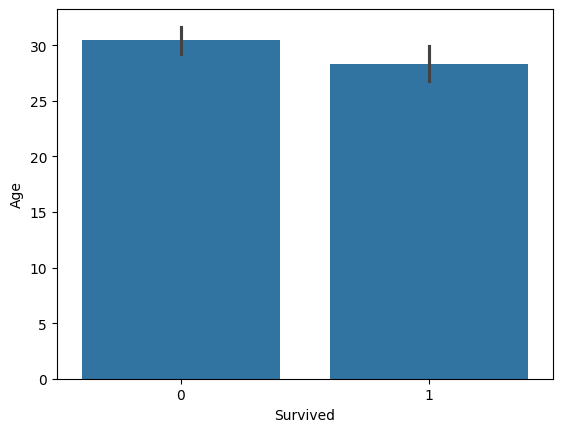

In [10]:
sns.barplot(data= df, x='Survived', y='Age')
plt.xlabel('Survived')
plt.ylabel('Age')
# plt.xticks(rotation=45)
plt.show()


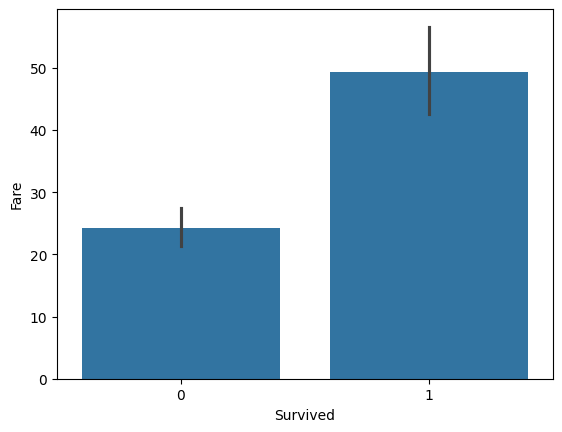

In [11]:
sns.barplot(data= df, x='Survived', y='Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
# plt.xticks(rotation=45)
plt.show()

In [12]:
df['Family']= df['SibSp'] + df['Parch']

In [13]:
df= df.drop(columns= ['SibSp', 'Parch'])

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.head()

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [17]:
X= df.drop(columns= 'Survived')
y= df['Survived']

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 2)
X_train.shape

(604, 3)

In [19]:
#without binarization

dtf= DecisionTreeClassifier(random_state= 0)

dtf.fit(X_train, y_train)

y_pred= dtf.predict(X_test)

accuracy_score(y_test, y_pred)

0.618421052631579

In [20]:
print(np.mean(cross_val_score(DecisionTreeClassifier(random_state= 0),X,y, cv= 15, scoring= 'accuracy')))

0.5793725490196078


In [21]:
from sklearn.preprocessing import Binarizer

In [22]:
trf= ColumnTransformer([
    ('bin', Binarizer(copy= False),['Family'])
],
  remainder= 'passthrough'  
)

X_train_trf= trf.fit_transform(X_train, y_train)
X_test_trf= trf.transform(X_test)

In [23]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,28.0,133.6500
1,0.0,32.0,13.0000
2,0.0,26.0,10.5000
3,0.0,30.5,8.0500
4,0.0,47.0,34.0208
...,...,...,...
599,1.0,26.0,16.1000
600,1.0,36.0,512.3292
601,1.0,24.0,24.1500
602,0.0,30.0,7.8958


In [24]:
dtf2= DecisionTreeClassifier(random_state= 0)
dtf2.fit(X_train_trf, y_train)

y_pred2= dtf2.predict(X_test_trf)
accuracy_score(y_test, y_pred2)

0.5723684210526315

In [25]:
X_trf= trf.fit_transform(X)
print(np.mean(cross_val_score(DecisionTreeClassifier(random_state= 0),X_trf,y, cv= 15, scoring= 'accuracy')))

0.5833725490196078
